In [1]:
# Essentials
import gc
import numpy as np
import pandas as pd
import datetime
import random
import warnings
import string
from skopt.space import Real, Categorical, Integer
warnings.filterwarnings("ignore")
import functools
import dask
import os
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])

# Plots
import matplotlib.pyplot as plt

# 1 数据处理

## 1.1 读取数据

In [2]:
data = pd.read_csv("20210104.csv")
data

,InstrumentID,UpdateTime,UpdateMillisec,\t\t\t\t\tLastPrice,Volume,Turnover,OpenInterest,\t\t\t\t\tBidPrice1,BidVolume1,AskPrice1,...,AskVolume4,\t\t\t\t\tBidPrice5,BidVolume5,AskPrice5,AskVolume5,\t\t\t\t\tUpperLimitPrice,LowerLimitPrice,OpenPrice,HighestPrice,LowestPrice
0,IF2106,09:29:00,400,5190.000,18,2.802600e+07,25230.0,5190.000,1,5190.20,...,1,5196.20,3,5196.80,2,5684.800,4651.200,5190.0,5190.0,5190.0
1,IH2106,09:29:00,400,3626.800,3,3.264120e+06,11693.0,3625.800,1,3627.00,...,1,3629.40,2,3630.00,2,3989.600,3264.400,3626.8,3626.8,3626.8
2,T2109,09:29:00,400,97.675,0,0.000000e+00,295.0,97.450,1,97.80,...,5,97.89,5,97.90,3,99.605,95.705,0.0,0.0,0.0
3,TF2109,09:29:00,400,99.660,0,0.000000e+00,30.0,99.470,5,99.77,...,10,99.81,5,99.82,5,100.855,98.465,0.0,0.0,0.0
4,TS2109,09:29:00,400,100.255,0,0.000000e+00,57.0,100.155,5,100.24,...,6,100.29,15,100.30,5,100.700,99.700,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374613,IC2103,15:53:58,400,6319.000,25273,3.190409e+10,78438.0,6319.000,1,6320.00,...,1,6321.00,7,6321.20,1,6876.400,5626.400,6272.0,6369.6,6241.0
374614,IF2103,15:53:58,400,5257.400,24260,3.821918e+10,84072.0,5257.000,3,5257.40,...,2,5259.60,13,5260.00,1,5732.600,4690.600,5232.6,5294.8,5196.0
374615,IH2103,15:53:58,400,3639.400,9505,1.037017e+10,25368.0,3639.200,1,3640.40,...,4,3641.00,1,3642.80,2,4000.400,3273.200,3642.2,3667.2,3608.2
374616,IC2106,15:53:58,400,6167.000,8449,1.040554e+10,54320.0,6166.600,1,6167.60,...,1,6172.00,1,6173.00,1,6712.600,5492.200,6135.8,6212.6,6096.2


In [3]:
data.shape

(374618, 32)

In [4]:
IC = data[data["InstrumentID"] == "IC2101"].reset_index(drop = True)

In [5]:
IC

,InstrumentID,UpdateTime,UpdateMillisec,\t\t\t\t\tLastPrice,Volume,Turnover,OpenInterest,\t\t\t\t\tBidPrice1,BidVolume1,AskPrice1,...,AskVolume4,\t\t\t\t\tBidPrice5,BidVolume5,AskPrice5,AskVolume5,\t\t\t\t\tUpperLimitPrice,LowerLimitPrice,OpenPrice,HighestPrice,LowestPrice
0,IC2101,09:29:00,400,6384.0,266,3.396288e+08,90924.0,6381.2,5,6384.8,...,5,6387.0,4,6388.0,8,6978.0,5709.6,6384.0,6384.0,6384.0
1,IC2101,09:30:00,400,6381.2,376,4.800470e+08,90893.0,6377.8,1,6381.2,...,1,6384.0,1,6384.2,1,6978.0,5709.6,6384.0,6390.0,6377.2
2,IC2101,09:30:00,900,6381.2,445,5.680861e+08,90863.0,6378.0,1,6381.2,...,1,6384.0,2,6384.4,2,6978.0,5709.6,6384.0,6390.0,6377.2
3,IC2101,09:30:01,400,6378.0,493,6.293228e+08,90836.0,6376.8,3,6377.8,...,1,6380.6,68,6380.8,3,6978.0,5709.6,6384.0,6390.0,6376.8
4,IC2101,09:30:01,900,6376.8,522,6.663078e+08,90819.0,6376.0,3,6376.2,...,14,6377.2,1,6377.4,15,6978.0,5709.6,6384.0,6390.0,6376.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27425,IC2101,14:59:59,900,6434.0,70651,9.074043e+10,86960.0,6433.0,3,6434.2,...,3,6435.0,1,6435.6,4,6978.0,5709.6,6384.0,6489.8,6334.0
27426,IC2101,15:00:00,400,6434.2,70652,9.074172e+10,86961.0,6434.2,2,6434.4,...,3,6435.6,4,6436.0,1,6978.0,5709.6,6384.0,6489.8,6334.0
27427,IC2101,15:30:48,900,6434.2,70652,9.074172e+10,86961.0,6434.2,2,6434.4,...,3,6435.6,4,6436.0,1,6978.0,5709.6,6384.0,6489.8,6334.0
27428,IC2101,15:35:19,400,6434.2,70652,9.074172e+10,86961.0,6434.2,2,6434.4,...,3,6435.6,4,6436.0,1,6978.0,5709.6,6384.0,6489.8,6334.0


In [6]:
#time = IC.iloc[:,2]
#orderbook = IC.iloc[:,10:30]
#IC = pd.concat([time, orderbook], axis = 1)
IC = IC.iloc[1:27425,7:27].reset_index(drop = True)
IC

,\t\t\t\t\tBidPrice1,BidVolume1,AskPrice1,AskVolume1,\t\t\t\t\tBidPrice2,BidVolume2,AskPrice2,AskVolume2,\t\t\t\t\tBidPrice3,BidVolume3,AskPrice3,AskVolume3,\t\t\t\t\tBidPrice4,BidVolume4,AskPrice4,AskVolume4,\t\t\t\t\tBidPrice5,BidVolume5,AskPrice5,AskVolume5
0,6377.8,1,6381.2,12,6377.2,9,6376.8,5,6382.0,2,6383.8,1,6375.2,5,6375.0,1,6384.0,1,6384.2,1
1,6378.0,1,6381.2,2,6377.8,8,6376.8,5,6382.0,2,6383.0,1,6375.2,5,6373.8,1,6384.0,2,6384.4,2
2,6376.8,3,6377.8,1,6376.0,4,6375.2,5,6378.0,3,6380.0,2,6373.8,1,6372.0,1,6380.6,68,6380.8,3
3,6376.0,3,6376.2,1,6375.2,5,6373.8,1,6376.8,7,6377.0,3,6372.0,2,6370.0,14,6377.2,1,6377.4,15
4,6374.0,1,6374.6,1,6373.8,1,6372.0,2,6375.8,1,6376.0,6,6370.0,14,6367.0,1,6376.2,11,6376.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,6434.0,2,6434.8,2,6433.2,7,6433.0,2,6435.0,2,6435.6,4,6432.8,1,6432.2,3,6436.0,1,6437.0,1
27420,6434.0,2,6434.6,1,6433.2,7,6433.0,3,6434.8,1,6435.0,1,6432.8,2,6432.2,3,6435.6,4,6436.0,1
27421,6434.0,2,6434.4,1,6433.2,7,6433.0,4,6434.6,1,6434.8,1,6432.8,2,6432.2,3,6435.0,1,6435.6,4
27422,6433.2,2,6434.0,1,6433.0,4,6432.8,3,6434.4,1,6434.6,1,6432.2,3,6432.0,9,6434.8,1,6435.0,1


In [7]:
IC = IC.rename(columns={"\t\t\t\t\tBidPrice1":"BidPrice1",
                       "\t\t\t\t\tBidPrice2":"BidPrice2",
                       "\t\t\t\t\tBidPrice3":"BidPrice3",
                       "\t\t\t\t\tBidPrice4":"BidPrice4",
                       "\t\t\t\t\tBidPrice5":"BidPrice5",
                       "AskVolume1":"AskVol1",
                        "AskVolume2":"AskVol2",
                       "AskVolume3":"AskVol3",
                       "AskVolume4":"AskVol4",
                       "AskVolume5":"AskVol5",
                       "BidVolume1":"BidVol1",
                        "BidVolume2":"BidVol2",
                       "BidVolume3":"BidVol3",
                       "BidVolume4":"BidVol4",
                       "BidVolume5":"BidVol5"})
IC

,BidPrice1,BidVol1,AskPrice1,AskVol1,BidPrice2,BidVol2,AskPrice2,AskVol2,BidPrice3,BidVol3,AskPrice3,AskVol3,BidPrice4,BidVol4,AskPrice4,AskVol4,BidPrice5,BidVol5,AskPrice5,AskVol5
0,6377.8,1,6381.2,12,6377.2,9,6376.8,5,6382.0,2,6383.8,1,6375.2,5,6375.0,1,6384.0,1,6384.2,1
1,6378.0,1,6381.2,2,6377.8,8,6376.8,5,6382.0,2,6383.0,1,6375.2,5,6373.8,1,6384.0,2,6384.4,2
2,6376.8,3,6377.8,1,6376.0,4,6375.2,5,6378.0,3,6380.0,2,6373.8,1,6372.0,1,6380.6,68,6380.8,3
3,6376.0,3,6376.2,1,6375.2,5,6373.8,1,6376.8,7,6377.0,3,6372.0,2,6370.0,14,6377.2,1,6377.4,15
4,6374.0,1,6374.6,1,6373.8,1,6372.0,2,6375.8,1,6376.0,6,6370.0,14,6367.0,1,6376.2,11,6376.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,6434.0,2,6434.8,2,6433.2,7,6433.0,2,6435.0,2,6435.6,4,6432.8,1,6432.2,3,6436.0,1,6437.0,1
27420,6434.0,2,6434.6,1,6433.2,7,6433.0,3,6434.8,1,6435.0,1,6432.8,2,6432.2,3,6435.6,4,6436.0,1
27421,6434.0,2,6434.4,1,6433.2,7,6433.0,4,6434.6,1,6434.8,1,6432.8,2,6432.2,3,6435.0,1,6435.6,4
27422,6433.2,2,6434.0,1,6433.0,4,6432.8,3,6434.4,1,6434.6,1,6432.2,3,6432.0,9,6434.8,1,6435.0,1


In [8]:
features = IC.copy()

# 2 特征生成

## 2.1 Basic Set

In [9]:
#V1 set Price and Volumn(5 levels)
#for i in range(5):    
#    features['AskPrice'+ str(i+1)] = features['AskPrice'+ str(i+1)]/10000
#    features['BidPrice'+ str(i+1)] = features['BidPrice'+ str(i+1)]/10000

In [10]:
features

,BidPrice1,BidVol1,AskPrice1,AskVol1,BidPrice2,BidVol2,AskPrice2,AskVol2,BidPrice3,BidVol3,AskPrice3,AskVol3,BidPrice4,BidVol4,AskPrice4,AskVol4,BidPrice5,BidVol5,AskPrice5,AskVol5
0,6377.8,1,6381.2,12,6377.2,9,6376.8,5,6382.0,2,6383.8,1,6375.2,5,6375.0,1,6384.0,1,6384.2,1
1,6378.0,1,6381.2,2,6377.8,8,6376.8,5,6382.0,2,6383.0,1,6375.2,5,6373.8,1,6384.0,2,6384.4,2
2,6376.8,3,6377.8,1,6376.0,4,6375.2,5,6378.0,3,6380.0,2,6373.8,1,6372.0,1,6380.6,68,6380.8,3
3,6376.0,3,6376.2,1,6375.2,5,6373.8,1,6376.8,7,6377.0,3,6372.0,2,6370.0,14,6377.2,1,6377.4,15
4,6374.0,1,6374.6,1,6373.8,1,6372.0,2,6375.8,1,6376.0,6,6370.0,14,6367.0,1,6376.2,11,6376.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27419,6434.0,2,6434.8,2,6433.2,7,6433.0,2,6435.0,2,6435.6,4,6432.8,1,6432.2,3,6436.0,1,6437.0,1
27420,6434.0,2,6434.6,1,6433.2,7,6433.0,3,6434.8,1,6435.0,1,6432.8,2,6432.2,3,6435.6,4,6436.0,1
27421,6434.0,2,6434.4,1,6433.2,7,6433.0,4,6434.6,1,6434.8,1,6432.8,2,6432.2,3,6435.0,1,6435.6,4
27422,6433.2,2,6434.0,1,6433.0,4,6432.8,3,6434.4,1,6434.6,1,6432.2,3,6432.0,9,6434.8,1,6435.0,1


## 2.2 Time-insensitive Set

In [11]:
#V2 set Bid-ask spreads and mid-prices
for i in range(5):    
    features['Bid_ask_spread'+ str(i+1)] = features['AskPrice'+ str(i+1)] - features['BidPrice'+ str(i+1)]
    features['Mid_price'+ str(i+1)] = (features['BidPrice'+ str(i+1)]+ features['AskPrice'+ str(i+1)])/2

In [12]:
#V3 set Price differences
for i in range(4):    
    features['price_range_ask'+ str(i+2)] = features['AskPrice'+ str(i+2)] - features['AskPrice'+ str(i+1)]
    features['price_range_bid'+ str(i+2)] = features['BidPrice'+ str(i+2)] - features['BidPrice'+ str(i+1)]

In [13]:
#V4 set Mean prices and volumes   
features['mean_ask_price'] = (features['AskPrice1']+features['AskPrice2']+features['AskPrice3']+features['AskPrice4']+features['AskPrice5'])/5
features['mean_bid_price'] = (features['BidPrice1']+features['BidPrice2']+features['BidPrice3']+features['BidPrice4']+features['BidPrice5'])/5
features['mean_ask_volumn'] = (features['AskVol1']+features['AskVol2']+features['AskVol3']+features['AskVol4']+features['AskVol5'])/5
features['mean_bid_volumn'] = (features['BidVol1']+features['BidVol2']+features['BidVol3']+features['BidVol4']+features['BidVol5'])/5

In [14]:
#V5 set Accumulated differences
features['Accumulated_differences_price'] = (features['AskPrice1']-features['BidPrice1']+features['AskPrice2']-features['BidPrice2']+
                                             features['AskPrice3']-features['BidPrice3']+features['AskPrice4']-features['BidPrice4']+
                                             features['AskPrice5']-features['BidPrice5'])
features['Accumulated_differences_vol'] = (features['AskVol1']-features['BidVol1']+features['AskVol2']-features['BidVol2']+
                                             features['AskVol3']-features['BidVol3']+features['AskVol4']-features['BidVol4']+
                                             features['AskVol5']-features['BidVol5'])

## 2.3 Time-sensitive Set

In [15]:
#V6 Price and Volumn derivatives
for i in range(5):    
    features['Ask_price_derivative'+ str(i+1)] = (features['AskPrice'+ str(i+1)] - features['AskPrice'+ str(i+1)].shift(5))/5
    features['Bid_price_derivative'+ str(i+1)] = (features['BidPrice'+ str(i+1)] - features['BidPrice'+ str(i+1)].shift(5))/5
    features['Ask_vol_derivative'+ str(i+1)] = (features['AskVol'+ str(i+1)] - features['AskVol'+ str(i+1)].shift(5))/5
    features['Bid_vol_derivative'+ str(i+1)] = (features['BidVol'+ str(i+1)] - features['BidVol'+ str(i+1)].shift(5))/5

In [16]:
features = features.iloc[6:,:].reset_index(drop = True)

In [17]:
features

,BidPrice1,BidVol1,AskPrice1,AskVol1,BidPrice2,BidVol2,AskPrice2,AskVol2,BidPrice3,BidVol3,...,Ask_vol_derivative3,Bid_vol_derivative3,Ask_price_derivative4,Bid_price_derivative4,Ask_vol_derivative4,Bid_vol_derivative4,Ask_price_derivative5,Bid_price_derivative5,Ask_vol_derivative5,Bid_vol_derivative5
0,6370.0,3,6374.0,1,6367.0,1,6363.4,1,6374.6,1,...,0.0,-0.2,-2.60,-2.84,0.0,1.0,-1.68,-1.72,2.0,-0.2
1,6374.0,1,6376.0,12,6371.8,1,6371.2,3,6376.2,9,...,-0.2,1.2,-0.24,-0.56,0.0,1.2,-0.72,-0.76,-0.4,-12.2
2,6374.4,12,6375.8,2,6374.2,26,6374.0,2,6376.0,13,...,0.8,1.2,0.36,0.00,-2.6,0.4,-0.12,-0.12,-2.0,0.0
3,6374.6,31,6375.2,33,6374.4,12,6374.2,20,6375.8,4,...,-0.4,0.6,1.00,0.80,0.8,-2.4,0.00,0.08,-0.4,-2.0
4,6374.8,1,6375.2,13,6374.6,23,6374.4,12,6376.2,4,...,-0.4,0.6,2.12,1.44,0.2,3.8,0.04,0.12,-0.8,-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27413,6434.0,2,6434.8,2,6433.2,7,6433.0,2,6435.0,2,...,0.6,-2.0,0.00,0.04,0.0,-0.6,-0.56,-0.72,0.0,0.0
27414,6434.0,2,6434.6,1,6433.2,7,6433.0,3,6434.8,1,...,-0.6,-0.4,0.12,0.20,0.4,-0.2,-0.64,-0.48,0.0,-1.6
27415,6434.0,2,6434.4,1,6433.2,7,6433.0,4,6434.6,1,...,-0.6,-0.6,0.12,0.20,0.4,-0.2,-0.28,-0.20,0.6,0.0
27416,6433.2,2,6434.0,1,6433.0,4,6432.8,3,6434.4,1,...,-0.6,-0.6,0.08,0.08,1.6,0.0,-0.40,-0.24,0.0,0.0


## 2.4 Label标注

mid-price(upward,stationary,downward)

In [18]:
#mid-price
features['Mid_price'] = 0.5*(features['AskPrice1'] + features['BidPrice1'])

In [19]:
features['Mid_price_movement'] = np.zeros((len(features), 1))

In [20]:
%%time
# set upward as 0, stationary as 1, downward as 2
for i in range(len(features)-20):
    if features['Mid_price'][i+20] > features['Mid_price'][i]: 
        features['Mid_price_movement'][i] = 0
    elif features['Mid_price'][i+20] == features['Mid_price'][i]: 
        features['Mid_price_movement'][i] = 1
    else:
        features['Mid_price_movement'][i] = 2

Wall time: 12.1 s


bid-ask spread-crossing

In [21]:
%%time
features['Spread_crossing'] = np.zeros((len(features), 1))
# set upward as 0, stationary as 1, downward as 2
for i in range(len(features)-20):
    if features['BidPrice1'][i+20] > features['AskPrice1'][i]: 
        features['Spread_crossing'][i] = 0
    elif features['BidPrice1'][i+20] == features['AskPrice1'][i]: 
        features['Spread_crossing'][i] = 1
    else:
        features['Spread_crossing'][i] = 2

Wall time: 11.6 s


In [22]:
# Delete verbose info(mid-price)
features = features.drop(['Mid_price'], axis=1)

## 3 Exploratory Data Analysis

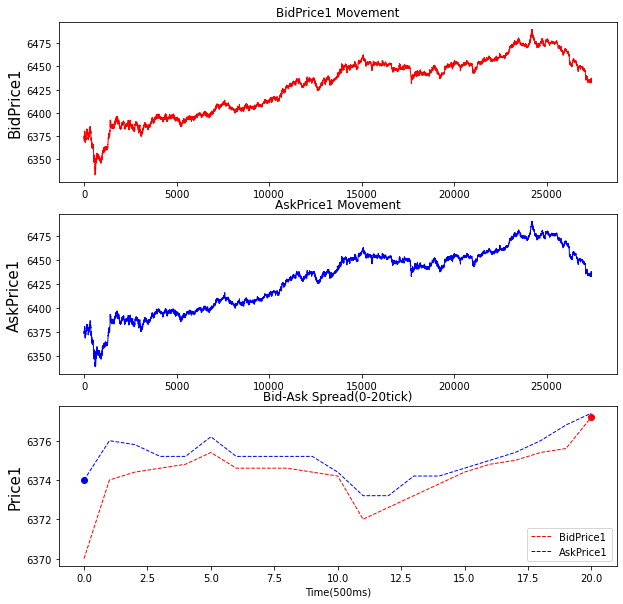

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,10))

ax1.plot((pd.Series(features['BidPrice1'])), lw=1, color='red')
ax1.set_title ("BidPrice1 Movement", fontsize=12);
#ax1.set_xlabel ("Time(500ms)", fontsize=18)
ax1.set_ylabel ("BidPrice1", fontsize=15);

ax2.plot((pd.Series(features['AskPrice1'])), lw=1, color='blue')
ax2.set_title ("AskPrice1 Movement", fontsize=12);
#ax2.set_xlabel ("Time(500ms)", fontsize=18)
ax2.set_ylabel ("AskPrice1", fontsize=15);

ax3.plot((pd.Series(features['BidPrice1']).iloc[0:21]), lw=1, color='red',label="BidPrice1",linestyle='--')
ax3.plot((pd.Series(features['AskPrice1']).iloc[0:21]), lw=1, color='blue',label='AskPrice1',linestyle='--')
ax3.scatter(20,features['BidPrice1'][20], color='red')
ax3.scatter(0,features['AskPrice1'][0], color='blue')
ax3.set_title ("Bid-Ask Spread(0-20tick)", fontsize=12);
ax3.set_xlabel ("Time(500ms)", fontsize=10)
ax3.set_ylabel ("Price1", fontsize=15);
ax3.legend()
gc.collect();

In [24]:
features = features.to_csv('features.csv')